# Conversion from Einstein A coefficient $A_{21}$ to oscillator strength $f$


The following relation is used in the conversion:

$f_{12}=\frac{g_2}{g_1}\frac{A_{21}}{E_{21}^2}\frac{\hbar m_e c^2}{2 \alpha} $

with the values of the constants taken from CODATA https://physics.nist.gov/cuu/Constants/: 
fine structure constant $\alpha = 7.2973525664\times10^{-3}$;
$\hbar=1.054571800\times10^{-34} \mathrm{J}\cdot \mathrm{s}$;
$m_ec^2=8.18710565\times10^{-14} \mathrm{J}$.
Make sure that $E_{21}$ is expressed in Joules, using the relation: $E = hck$, with $k$ usually expressed in $\mathrm{cm}^{-1}$.

The relation above is based on Eq. 33 in Robert C. Hilborn, *Einstein coefficients, cross sections, f values, dipole moments, and all that*, American Journal of Physics **50**, 982 (1982): https://doi.org/10.1119/1.12937.

$f_{12}=\frac{g_2}{g_1}\frac{2\pi\epsilon_0 m_e c^2}{\omega_{21}^2 e^2} A_{21}$

We verify that our conversion results are in agreement with those of Evelyne Roueff. In the updated files, I used their $f$ and $\Gamma$ values.

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib notebook

### Function for oscillator strength conversion

In [2]:
fine_structure_constant=7.2973525664e-3
hbar=1.054571800e-34 # J s
m_e_c_squared=8.18710565e-14 #J: mass of electron in energy units

h=6.626070040e-34 #J s
c_cm_per_sec=29979245800 #speed of light in cm/s for conversion of cm^{-1}
icm_to_J=h*c_cm_per_sec #wavenumber conversion: E = hck, with k in cm^{-1}

constantFactor = 0.5*hbar*m_e_c_squared/fine_structure_constant

def oscillatorStrength(branch="R",J_lower=0,A_coeff=0.0, E_in_icm=0.0):
    if branch == "R":
        J_upper = J_lower + 1
    elif branch == "P":
        J_upper = J_lower - 1
    elif branch == "Q":
        J_upper = J_lower
    else:
        print "Unknown transition type."
        return None
    
    f = ( 2.0*J_upper + 1 )/( 2.0*J_lower + 1 )*A_coeff/(E_in_icm*icm_to_J)**2*constantFactor
        
    return f

In [3]:
#Test function above for Werner v'=1, R-branch
E_Abgrall = [101457.97,101456.88,101395.25,101271.58,101125.54,100870.70,100577.88]
A_Abgrall = [0.1577E+09,0.1360E+09,0.1283E+09,0.1365E+09,0.4860E+07,0.6175E+08,0.7505E+08]

#print "line\tosc_strength"
f_new_conversion = []
for J in range(7):
    f_new_conversion.append(oscillatorStrength(branch="R", J_lower=J, A_coeff=A_Abgrall[J], E_in_icm=E_Abgrall[J]))
    #print "W1R%d\t%0.5f"%(J,f_new_conversion[J])

## Using python pandas in full set of transitions in VU database

Below we compare the $f$-values from the VU dataset with the recent files sent by Evelyne Roueff.

In [4]:
VU_database_filename = "EvelyneRoueff_13Aug2018/HydrogenData.dat"
columns=pd.read_csv(VU_database_filename, sep='\s+', header=44, nrows=2).columns[1:]
VU_database = pd.read_csv(VU_database_filename, sep='\s+', header=44, names=columns, index_col=False, skiprows=0)
#VU_database

In [5]:
Meudon_Lyman_database_filename = "EvelyneRoueff_13Aug2018/uvh2b29.dat"
columns=['trans_num','elec_label','v_lower','J_lower','v_upper','DeltaJ','osc_strength','wavelength','inverse_lifetime','diss_prob']
Meudon_Lyman_database= pd.read_csv(Meudon_Lyman_database_filename, sep='\s+', skiprows=1, index_col=None, names=columns)
#Meudon_Lyman_database

In [6]:
Meudon_Werner_database_filename = "EvelyneRoueff_13Aug2018/uvh2c29.dat"
columns=['trans_num','elec_label','v_lower','J_lower','v_upper','DeltaJ','osc_strength','wavelength','inverse_lifetime','diss_prob']
Meudon_Werner_database= pd.read_csv(Meudon_Werner_database_filename, sep='\s+', skiprows=1, index_col=None, names=columns)
#Meudon_Werner_database

## Actual comparison done here

We generate a new file that updates the VU database using the $f$-values and $\Gamma$-values from Evelyne.

In [7]:
LymanR_diff=[]
LymanP_diff=[]
WernerR_diff=[]
WernerP_diff=[]
WernerQ_diff=[]

LymanR_Gdiff=[]
LymanP_Gdiff=[]
WernerR_Gdiff=[]
WernerP_Gdiff=[]
WernerQ_Gdiff=[]

#Update the database with oscillator strengths and \Gamma values from Evelyne Roueff
Updated_database_filename = "EvelyneRoueff_13Aug2018/HydrogenData2018update.dat"
updated_file = open(Updated_database_filename,'w')

for index, transition in VU_database.iterrows():
    label = transition['Trans']
    #parsing label below; the last element, which is a space character, in re.split() output is ignored 
    electronicLabel, v_upper, transitionBranch, J_lower = tuple( re.split('(\d+)',label)[:-1] )
    v_upper = int(v_upper)
    v_lower = 0
    J_lower = int(J_lower)
    if transitionBranch == "R":
        J_upper = J_lower + 1
        DeltaJ = 1
    elif transitionBranch == "P":
        J_upper = J_lower - 1
        DeltaJ = -1
    elif transitionBranch == "Q":
        J_upper = J_lower
        DeltaJ = 0
    else:
        print "Unknown transition type."
        #return None
    #print electronicLabel, v_upper, J_upper, v_lower, J_lower, transitionBranch
    
    f_VU = transition['f']
    #New oscillator strength evaluation yet to be implemented
    wavelength_VU = transition['lambda_lab'] #in Angstrom
    wavelength_error = transition['sig_lambda'] #in Angstrom
    wavelength_ref = transition['Ref'] #reference
    K_coeff = transition['K']
    
    #E_in_icm = 1e8/wavelength
    Gamma_VU = transition['Gamma']
    
    if electronicLabel == 'L':
        Meudon_row = Meudon_Lyman_database.loc[(Meudon_Lyman_database['v_upper'] == v_upper) & (Meudon_Lyman_database['v_lower'] == v_lower) & (Meudon_Lyman_database['J_lower'] == J_lower) & (Meudon_Lyman_database['DeltaJ'] == DeltaJ) ]
        f_Meudon = Meudon_row.iloc[0]['osc_strength']
        f_diff = float(f_VU)-float(f_Meudon)
        #print "%s:\tf_VU=%.7f\tf_Meudon=%.7f\tf_diff=%.7f"%(label,f_VU,f_Meudon,f_diff)
        #New oscillator strength evaluation yet to be implemented
        #A_coeff = Meudon_row.iloc[0]['osc_strength']
        #f_new = oscillatorStrength(branch="R",J_lower=0,A_coeff=0.0, E_in_icm=0.0)
        
        Gamma_Meudon = Meudon_row.iloc[0]['inverse_lifetime']
        Gamma_diff = float(Gamma_VU)-float(Gamma_Meudon)
        #print "%s:\tGamma_VU=%e\tGamma_Meudon=%e\tGamma_diff=%e"%(label,Gamma_VU,Gamma_Meudon,Gamma_diff)
        #print "%s:\tGamma_VU=%e\tGamma_Meudon=%e\tpercent_diff=%e"%(label,Gamma_VU,Gamma_Meudon,Gamma_diff/Gamma_Meudon)

        if transitionBranch == "R":
            LymanR_diff.append(f_diff)
            LymanR_Gdiff.append(Gamma_diff)       
        elif transitionBranch == "P":
            LymanP_diff.append(f_diff)
            LymanP_Gdiff.append(Gamma_diff)     
        else: pass
        
        
    elif electronicLabel == 'W':
        Meudon_row = Meudon_Werner_database.loc[(Meudon_Werner_database['v_upper'] == v_upper) & (Meudon_Werner_database['v_lower'] == v_lower) & (Meudon_Werner_database['J_lower'] == J_lower) & (Meudon_Werner_database['DeltaJ'] == DeltaJ) ]
        f_Meudon = Meudon_row.iloc[0]['osc_strength']
        f_diff = float(f_VU)-float(f_Meudon)
        #print "%s:\tf_VU=%.7f\tf_Meudon=%.7f\tf_diff=%.7f"%(label,f_VU,f_Meudon,f_diff)
        
        Gamma_Meudon = Meudon_row.iloc[0]['inverse_lifetime']
        Gamma_diff = float(Gamma_VU)-float(Gamma_Meudon)
        #print "%s:\tGamma_VU=%e\tGamma_Meudon=%e\tpercent_diff=%e"%(label,Gamma_VU,Gamma_Meudon,Gamma_diff/Gamma_Meudon)
                
        if transitionBranch == "R":
            WernerR_diff.append(f_diff)
            WernerR_Gdiff.append(Gamma_diff)       
        elif transitionBranch == "P":
            WernerP_diff.append(f_diff)
            WernerP_Gdiff.append(Gamma_diff)       
        elif transitionBranch == "Q":
            WernerQ_diff.append(f_diff)
            WernerQ_Gdiff.append(Gamma_diff)       
        else: pass
        
    else: pass
    
    #Write updated values in a file
    #(Trans  lambda_lab  sig_lambda  Ref  f    Gamma   K)
    #print("%s\t%s\t%s\t%s\t%.3e\t%.3e\t% .8f\n"%(label,wavelength_VU,wavelength_error,wavelength_ref,float(f_Meudon),float(Gamma_Meudon),float(K_coeff)))
    updated_file.write("%s\t%.6f\t%.6f\t%s\t%.3e\t%.3e\t% .8f\n"%(label,float(wavelength_VU),float(wavelength_error),wavelength_ref,float(f_Meudon),float(Gamma_Meudon),float(K_coeff)))
    
updated_file.close()

### Note that $\Gamma$ difference is around $\sim10^{-3}$ or better.

## Oscillator strengths for Lyman lines and Werner $Q$ lines are in agreement 

<IPython.core.display.Javascript object>


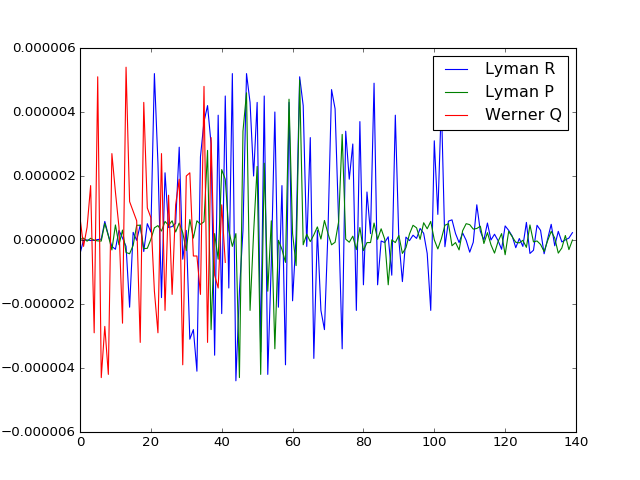

In [12]:
plt.figure(1)
plt.plot(LymanR_diff,label='Lyman R')
plt.plot(LymanP_diff,label='Lyman P')
plt.plot(WernerQ_diff,label='Werner Q')
plt.legend(loc='upper right');

## Oscillator strengths for Werner $R$ and $P$ lines have serious discrepancy

<IPython.core.display.Javascript object>


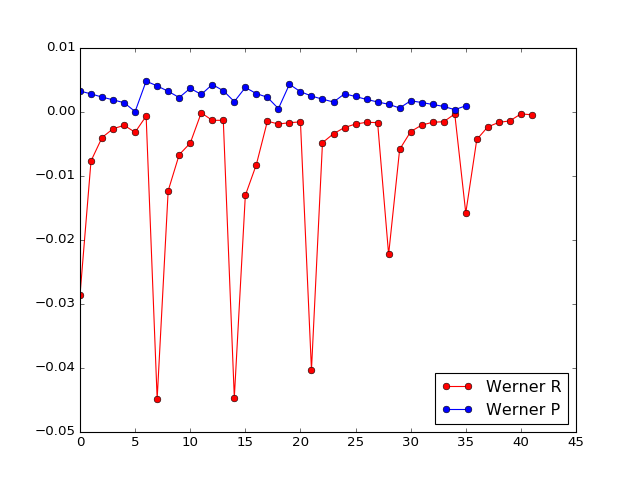

In [30]:
plt.figure(2)
plt.plot(WernerR_diff,'r-o',label='Werner R')
plt.plot(WernerP_diff,'b-o',label='Werner P')
plt.legend(loc='lower right');

## $\Gamma$ coefficients for Lyman and Werner lines are in agreement 

<IPython.core.display.Javascript object>


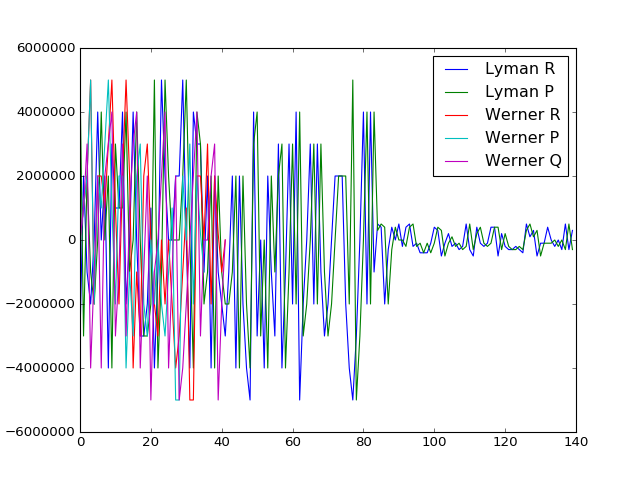

In [15]:
plt.figure(3)
plt.plot(LymanR_Gdiff,label='Lyman R')
plt.plot(LymanP_Gdiff,label='Lyman P')
plt.plot(WernerR_Gdiff,label='Werner R')
plt.plot(WernerP_Gdiff,label='Werner P')
plt.plot(WernerQ_Gdiff,label='Werner Q')
plt.legend(loc='upper right');

## The following explicitly checks if the update was done properly

In [25]:
#Column names in original database file used
columns=pd.read_csv(VU_database_filename, sep='\s+', header=44, nrows=2).columns[1:]
#VU_database_update performed above
VU_database_update = pd.read_csv(Updated_database_filename, sep='\s+', header=44, names=columns, index_col=False, skiprows=0)

In [19]:
LymanR_diff_update=[]
LymanP_diff_update=[]
WernerR_diff_update=[]
WernerP_diff_update=[]
WernerQ_diff_update=[]

LymanR_Gdiff_update=[]
LymanP_Gdiff_update=[]
WernerR_Gdiff_update=[]
WernerP_Gdiff_update=[]
WernerQ_Gdiff_update=[]

for index, transition in VU_database_update.iterrows():
    label = transition['Trans']
    #parsing label below; the last element, which is a space character, in re.split() output is ignored 
    electronicLabel, v_upper, transitionBranch, J_lower = tuple( re.split('(\d+)',label)[:-1] )
    v_upper = int(v_upper)
    v_lower = 0
    J_lower = int(J_lower)
    if transitionBranch == "R":
        J_upper = J_lower + 1
        DeltaJ = 1
    elif transitionBranch == "P":
        J_upper = J_lower - 1
        DeltaJ = -1
    elif transitionBranch == "Q":
        J_upper = J_lower
        DeltaJ = 0
    else:
        print "Unknown transition type."
        #return None
    #print electronicLabel, v_upper, J_upper, v_lower, J_lower, transitionBranch
    
    f_VU = transition['f']
    #New oscillator strength evaluation yet to be implemented
    wavelength_VU = transition['lambda_lab'] #in Angstrom
    wavelength_error = transition['sig_lambda'] #in Angstrom
    wavelength_ref = transition['Ref'] #reference
    K_coeff = transition['K']
    
    #E_in_icm = 1e8/wavelength
    Gamma_VU = transition['Gamma']
    
    if electronicLabel == 'L':
        Meudon_row = Meudon_Lyman_database.loc[(Meudon_Lyman_database['v_upper'] == v_upper) & (Meudon_Lyman_database['v_lower'] == v_lower) & (Meudon_Lyman_database['J_lower'] == J_lower) & (Meudon_Lyman_database['DeltaJ'] == DeltaJ) ]
        f_Meudon = Meudon_row.iloc[0]['osc_strength']
        f_diff = float(f_VU)-float(f_Meudon)
        #print "%s:\tf_VU=%.7f\tf_Meudon=%.7f\tf_diff=%.7f"%(label,f_VU,f_Meudon,f_diff)
        #New oscillator strength evaluation yet to be implemented
        #A_coeff = Meudon_row.iloc[0]['osc_strength']
        #f_new = oscillatorStrength(branch="R",J_lower=0,A_coeff=0.0, E_in_icm=0.0)
        
        Gamma_Meudon = Meudon_row.iloc[0]['inverse_lifetime']
        Gamma_diff = float(Gamma_VU)-float(Gamma_Meudon)
        #print "%s:\tGamma_VU=%e\tGamma_Meudon=%e\tGamma_diff=%e"%(label,Gamma_VU,Gamma_Meudon,Gamma_diff)
        #print "%s:\tGamma_VU=%e\tGamma_Meudon=%e\tpercent_diff=%e"%(label,Gamma_VU,Gamma_Meudon,Gamma_diff/Gamma_Meudon)

        if transitionBranch == "R":
            LymanR_diff_update.append(f_diff)
            LymanR_Gdiff_update.append(Gamma_diff)       
        elif transitionBranch == "P":
            LymanP_diff_update.append(f_diff)
            LymanP_Gdiff_update.append(Gamma_diff)     
        else: pass
        
        
    elif electronicLabel == 'W':
        Meudon_row = Meudon_Werner_database.loc[(Meudon_Werner_database['v_upper'] == v_upper) & (Meudon_Werner_database['v_lower'] == v_lower) & (Meudon_Werner_database['J_lower'] == J_lower) & (Meudon_Werner_database['DeltaJ'] == DeltaJ) ]
        f_Meudon = Meudon_row.iloc[0]['osc_strength']
        f_diff = float(f_VU)-float(f_Meudon)
        #print "%s:\tf_VU=%.7f\tf_Meudon=%.7f\tf_diff=%.7f"%(label,f_VU,f_Meudon,f_diff)
        
        Gamma_Meudon = Meudon_row.iloc[0]['inverse_lifetime']
        Gamma_diff = float(Gamma_VU)-float(Gamma_Meudon)
        #print "%s:\tGamma_VU=%e\tGamma_Meudon=%e\tpercent_diff=%e"%(label,Gamma_VU,Gamma_Meudon,Gamma_diff/Gamma_Meudon)
                
        if transitionBranch == "R":
            WernerR_diff_update.append(f_diff)
            WernerR_Gdiff_update.append(Gamma_diff)       
        elif transitionBranch == "P":
            WernerP_diff_update.append(f_diff)
            WernerP_Gdiff_update.append(Gamma_diff)       
        elif transitionBranch == "Q":
            WernerQ_diff_update.append(f_diff)
            WernerQ_Gdiff_update.append(Gamma_diff)       
        else: pass
        
    else: pass
    
    #Write updated values in a file
    #(Trans  lambda_lab  sig_lambda  Ref  f    Gamma   K)
    #print("%s\t%s\t%s\t%s\t%.3e\t%.3e\t% .8f\n"%(label,wavelength_VU,wavelength_error,wavelength_ref,float(f_Meudon),float(Gamma_Meudon),float(K_coeff)))
    #updated_file.write("%s\t%.6f\t%.6f\t%s\t%.3e\t%.3e\t% .8f\n"%(label,float(wavelength_VU),float(wavelength_error),wavelength_ref,float(f_Meudon),float(Gamma_Meudon),float(K_coeff)))
    


<IPython.core.display.Javascript object>


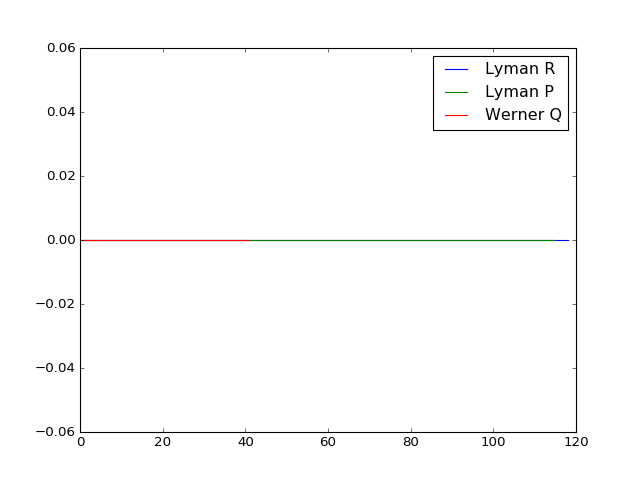

In [20]:
plt.figure(4)
plt.plot(LymanR_diff_update,label='Lyman R')
plt.plot(LymanP_diff_update,label='Lyman P')
plt.plot(WernerQ_diff_update,label='Werner Q')
plt.legend(loc='upper right');

<IPython.core.display.Javascript object>


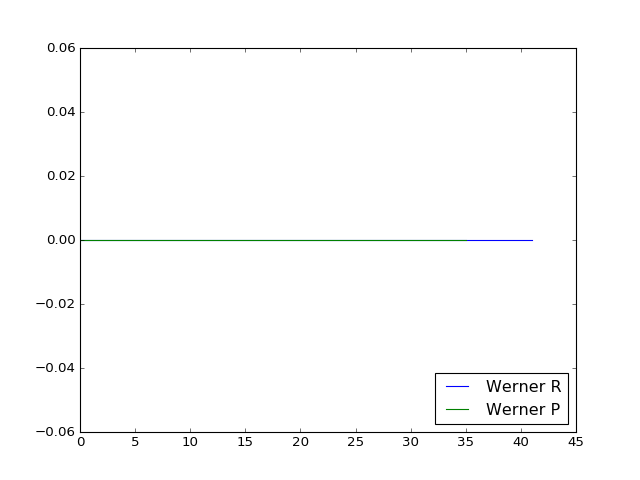

In [24]:
plt.figure(5)
plt.plot(WernerR_diff_update,label='Werner R')
plt.plot(WernerP_diff_update,label='Werner P')
plt.legend(loc='lower right');

# Remarks

From the data files that Evelyne sent, we confirm that the relation used above gives the same result as theirs.

It is indeed strange that the P and R branches of the Werner bands has large deviation.

In the update, I did not run that function, but just used the values that Evelyne provided. Even though the Gamma coefficients were similar, I updated those values as well.

After the automatic update, I run the comparison again and confirm that it is correct.